<a href="https://colab.research.google.com/github/Netesh5/Wheat_Disease_Detection/blob/main/Wheat_Disease_Detection_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import glob as gb
import random
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import callbacks
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.saving import save_model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
## Loading Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# keras_model = load_model("/content/drive/MyDrive/College_Project_Materials/custom_cnn_model.h5")

In [ ]:
# import tensorflow as tf

# converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
# tfmodel = converter.convert()

# with open('cnn_model.tflite', 'wb') as f:
#     f.write(tfmodel)

In [ ]:
!ls

drive  sample_data


In [ ]:
# !unzip drive/MyDrive/Refactored_Dataset.zip > /dev/null
!unzip drive/MyDrive/project/wheat_leaves.zip > /dev/null
#!unzip drive/MyDrive/dataset_splitted.zip > /dev/null



In [ ]:
SOURCE_PATH = "wheat_leaves/"

DISEASE_CLASSES = ["Crown and Root Rot", "Fusarium Head Blight", "Healthy Wheat","Leaf Rust","Wheat Loose Smut","Wheat___Yellow_Rust"]

In [ ]:
classes = os.listdir(SOURCE_PATH)
print(classes)

['Wheat___Yellow_Rust', 'Fusarium Head Blight', 'Leaf Rust', 'Healthy Wheat', 'Crown and Root Rot', 'Wheat Loose Smut']


In [ ]:
data_counts = []
def count_images(data_path):
  for dir in os.listdir(data_path):
    image_dir = os.path.join(data_path, dir)
    count = 0
    for images in os.listdir(image_dir):
      count += 1
    data_counts.append(count)
    msg = f"Number of images in {dir} is: {count}"
    print(msg)

In [ ]:
count_images(SOURCE_PATH)

Number of images in Wheat___Yellow_Rust is: 923
Number of images in Fusarium Head Blight is: 708
Number of images in Leaf Rust is: 717
Number of images in Healthy Wheat is: 1208
Number of images in Crown and Root Rot is: 929
Number of images in Wheat Loose Smut is: 923


In [ ]:
print(data_counts)
print(f"Total Images: {sum(data_counts)}")

[923, 708, 717, 1208, 929, 923]
Total Images: 5408


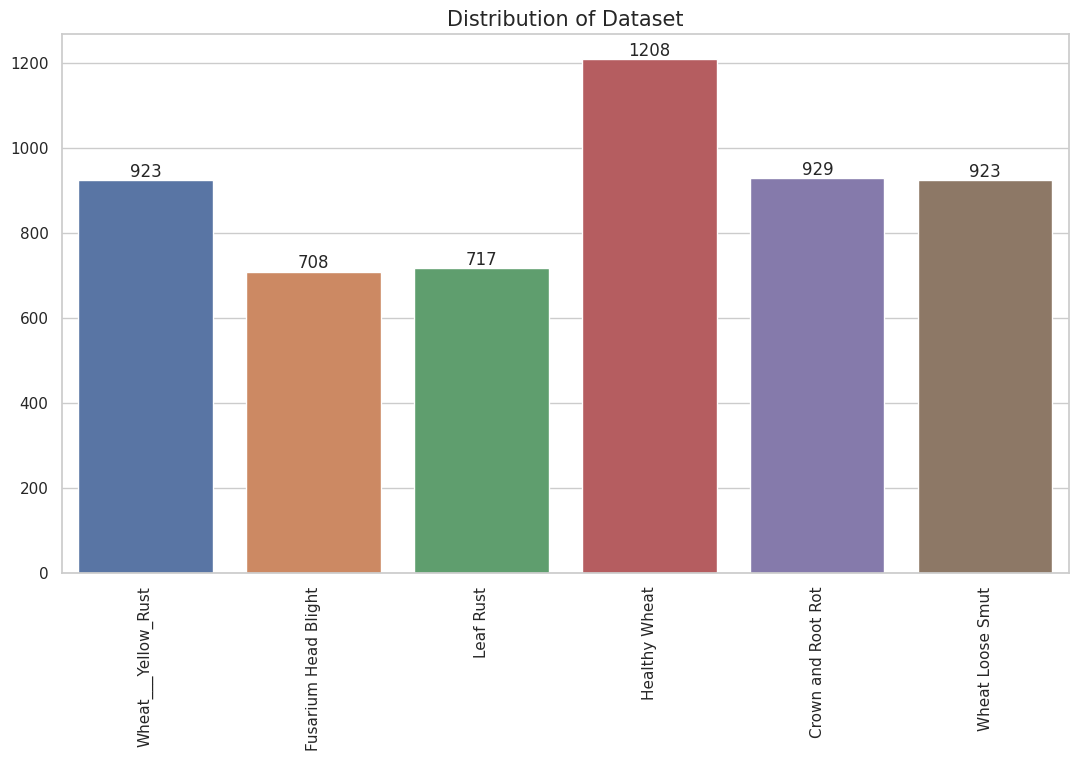

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,7))
ax = sns.barplot(x=classes, y=data_counts, hue=classes)
for container in ax.containers:
 ax.bar_label(container)
plt.title("Distribution of Dataset", fontsize=15, fontweight=20)
plt.xticks(rotation=90)
plt.show()


In [ ]:
## Splitting Dataset

In [ ]:
def split_image_dataset(source_data, data_path, test_size=0.1, validation_size=0.1, random_seed=None):
  """
  This function splits the original source data into train, test and validation
  using the (80,10,10) distribution principle

  Args:
      soruce_data(str): path of original source data.
      data_path(str): path of destination folder after splitting.
      test_size(float): test data size percentage. Default is 0.1.
      validation_size(float): validation data size percentage. Default is 0.1.
      random_seed(int): seed value for splitting randomly.

  """
  if not os.path.exists(data_path):
    os.makedirs(data_path)

  train_path = os.path.join(data_path, "train")
  test_path = os.path.join(data_path, "test")
  val_path = os.path.join(data_path, "validation")

  for path in [train_path, test_path, val_path]:
    if not os.path.exists(path):
      os.makedirs(path)

  for img_class in os.listdir(source_data):
    class_path = os.path.join(source_data, img_class)

    if os.path.isdir(class_path):
      for new_path in [os.path.join(train_path, img_class), os.path.join(test_path, img_class), os.path.join(val_path, img_class)]:
        if not os.path.exists(new_path):
          os.makedirs(new_path)

      class_images = os.listdir(class_path)
      train_images, test_val_images = train_test_split(class_images, test_size=(test_size + validation_size), shuffle=True, random_state=random_seed)
      test_images, val_images = train_test_split(test_val_images, test_size=validation_size/(test_size + validation_size), shuffle=True, random_state=random_seed)

      for image in train_images:
        shutil.copy2(os.path.join(class_path, image), os.path.join(train_path, img_class, image))
      for image in test_images:
        shutil.copy2(os.path.join(class_path, image), os.path.join(test_path, img_class, image))
      for image in val_images:
        shutil.copy2(os.path.join(class_path, image), os.path.join(val_path, img_class, image))

      print(f"Generated train, test and validation dataset for {img_class}")


In [ ]:
print(0.1/0.2)

0.5


In [ ]:
split_image_dataset(SOURCE_PATH, 'dataset', random_seed=42)

Generated train, test and validation dataset for Wheat___Yellow_Rust
Generated train, test and validation dataset for Fusarium Head Blight
Generated train, test and validation dataset for Leaf Rust
Generated train, test and validation dataset for Healthy Wheat
Generated train, test and validation dataset for Crown and Root Rot
Generated train, test and validation dataset for Wheat Loose Smut


In [ ]:
for dir in os.listdir('dataset/'):
  print("=" * 50)
  print(f"Counting number of images in {dir}...")
  count_images(f"dataset/{dir}")

Counting number of images in validation...
Number of images in Wheat___Yellow_Rust is: 93
Number of images in Fusarium Head Blight is: 71
Number of images in Leaf Rust is: 72
Number of images in Healthy Wheat is: 121
Number of images in Crown and Root Rot is: 93
Number of images in Wheat Loose Smut is: 93
Counting number of images in test...
Number of images in Wheat___Yellow_Rust is: 92
Number of images in Fusarium Head Blight is: 71
Number of images in Leaf Rust is: 72
Number of images in Healthy Wheat is: 121
Number of images in Crown and Root Rot is: 93
Number of images in Wheat Loose Smut is: 92
Counting number of images in train...
Number of images in Wheat___Yellow_Rust is: 738
Number of images in Fusarium Head Blight is: 566
Number of images in Leaf Rust is: 573
Number of images in Healthy Wheat is: 966
Number of images in Crown and Root Rot is: 743
Number of images in Wheat Loose Smut is: 738


In [ ]:
 #!zip -r drive/MyDrive/dataset_splitted.zip dataset/ > /dev/null

In [ ]:
num_classes = len(os.listdir("dataset/train"))
print(num_classes)

6


In [ ]:
### Using Transformers in Images

In [ ]:
import skimage
import skimage.color
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """returns itself"""
        return self

    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])


class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """

    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)

        try:
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

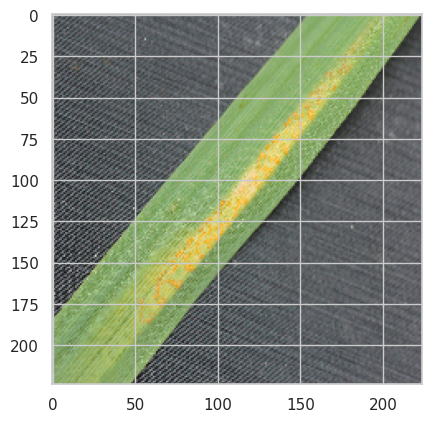

In [ ]:
X_train_ = cv2.cvtColor(cv2.imread("/content/wheat_leaves/Leaf Rust/16001.jpg"),cv2.COLOR_BGR2RGB)
X_train = cv2.resize(X_train_, (224,224))
plt.imshow(X_train)

In [ ]:
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
        pixels_per_cell=(2, 2),
        cells_per_block=(1,1),
        block_norm='L2-Hys',
        orientations=9,
)
scalify = StandardScaler()

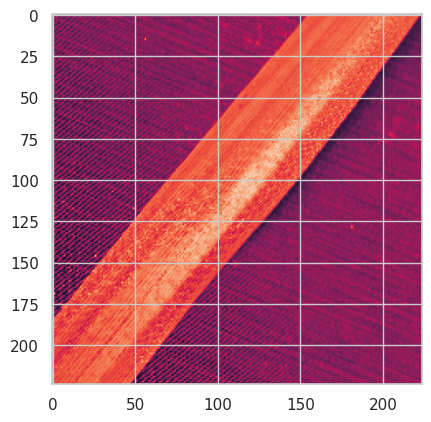

In [ ]:
X_train_gray = grayify.fit_transform(X_train)
plt.imshow(X_train_gray)

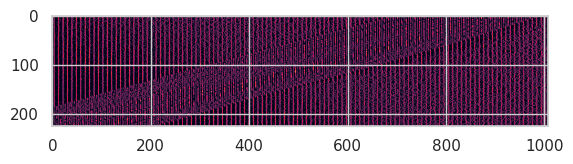

In [ ]:
X_train_hog = hogify.fit_transform(X_train)
plt.imshow(X_train_hog)

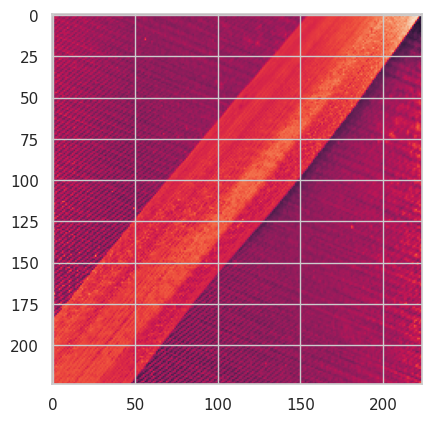

In [ ]:
X_train_prepared = scalify.fit_transform(X_train_gray)
plt.imshow(X_train_prepared)

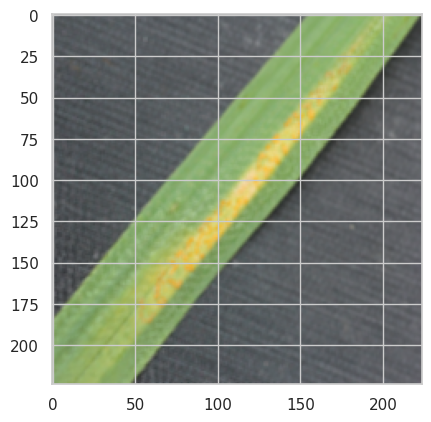

In [ ]:
X_train_blurred = cv2.GaussianBlur(X_train, ksize=(3,3), sigmaX=2)
plt.imshow(X_train_blurred)

In [ ]:
# call fit_transform on each transform converting X_train step by step
X_train_prepared = scalify.fit_transform(X_train_hog)

# X_test_gray = grayify.transform(X_test)
# X_test_hog = hogify.transform(X_test)
# X_test_prepared = scalify.transform(X_test_hog)

print(X_train_prepared.shape)

(224, 1008)


In [ ]:
### Displaying Sample Images


In [ ]:
#Viewing sample images of each class
def display_sample_images(img_dir):
  class_dirs = [d for d in os.listdir(img_dir) if os.path.isdir(os.path.join(img_dir, d))]
  num_rows = 2
  num_cols = 3
  fig_width = 15
  fig_height = 5 * num_rows

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

  for i, class_dir in enumerate(class_dirs):
      class_path = os.path.join(img_dir, class_dir)
      image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

      if image_files:
          random_image_file = random.choice(image_files)
          image_path = os.path.join(class_path, random_image_file)
          img = cv2.imread(image_path)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          row = i // num_cols
          col = i % num_cols
          axes[row, col].imshow(img)
          axes[row, col].set_title(f"Class: {class_dir}")
          axes[row, col].set_xlabel(f"Image Shape: {img.shape}", fontsize=10)
          axes[row, col].grid(False)
          # axes[row, col].axis('off')
  plt.show()


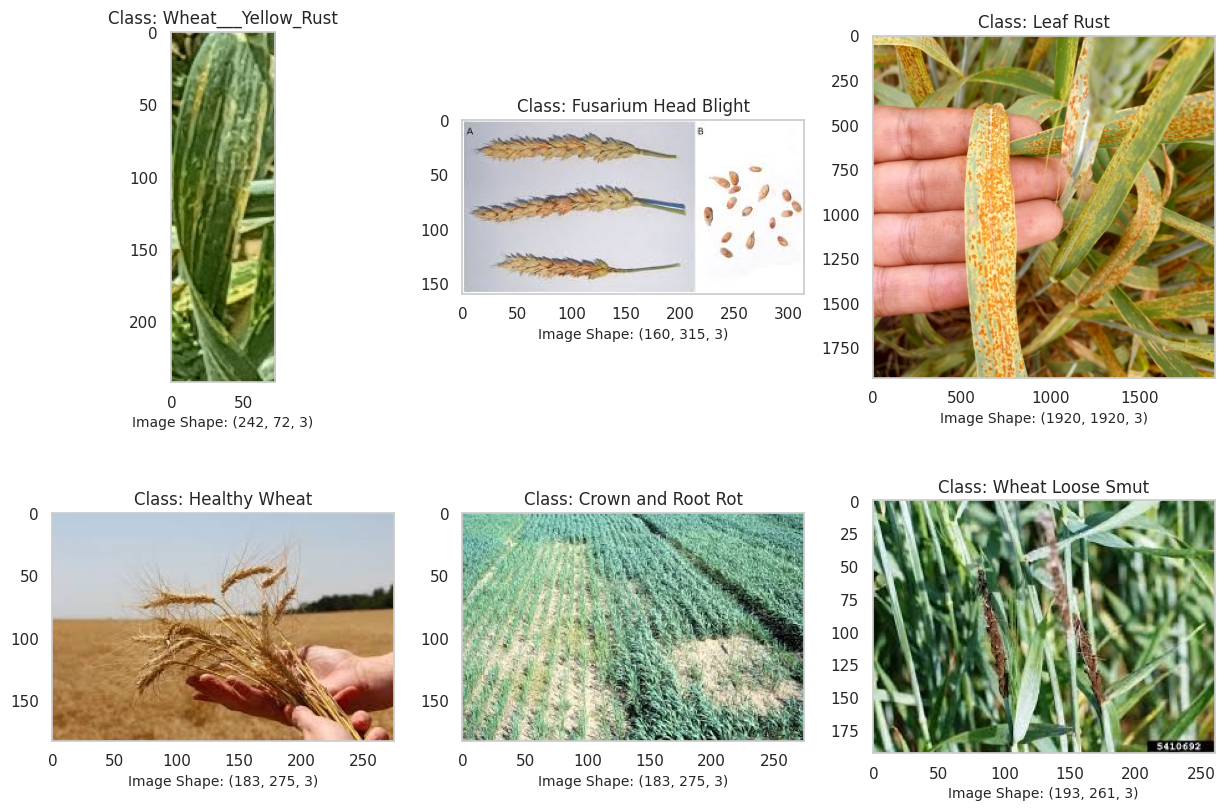

In [ ]:
display_sample_images('dataset/train')

In [ ]:
## Building a Model

In [ ]:
!nvidia-smi


Mon Apr  8 04:49:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
train_dir = 'dataset/train'
validation_dir = 'dataset/validation'
test_dir = 'dataset/test'

IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 24
CHANNELS = 3


def load_image(image_path):
  return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

def preprocess_image(image):
  img = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.expand_dims(img, axis=0)
  img = img / 255.0
  return img

In [ ]:
sample_img = load_image('/content/dataset/train/Wheat___Yellow_Rust/Yellow_rust397.png')
sample_pp_img = preprocess_image(sample_img)

<class 'numpy.ndarray'>
(374, 332, 3)


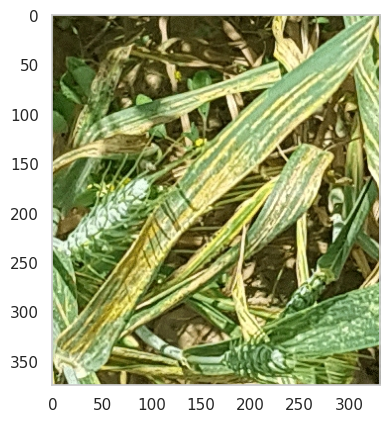

In [ ]:
#Image before Preprocessing
print(type(sample_img))
print(sample_img.shape)
plt.imshow(np.squeeze(sample_img))
plt.grid(False)

<class 'numpy.ndarray'>
(1, 224, 224, 3)


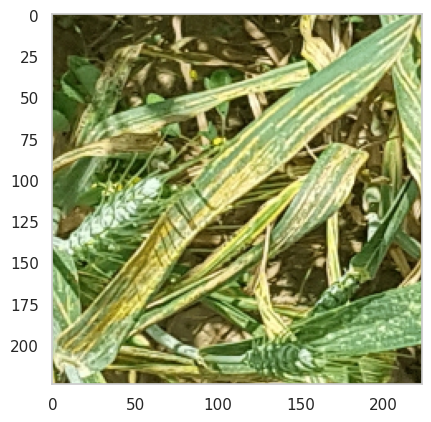

In [ ]:
# Image after Preprocessing
print(type(sample_pp_img))
print(sample_pp_img.shape)
plt.imshow(np.squeeze(sample_pp_img))
plt.grid(False)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    # shear_range=0.2,
    # brightness_range = [0.5, 1.5],
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest'
    )

valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    seed=42)

validation_generator = valid_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical')

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical')


Found 4324 images belonging to 6 classes.
Found 543 images belonging to 6 classes.
Found 541 images belonging to 6 classes.


In [ ]:
#### Custom CNN Model

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 16)      64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                        

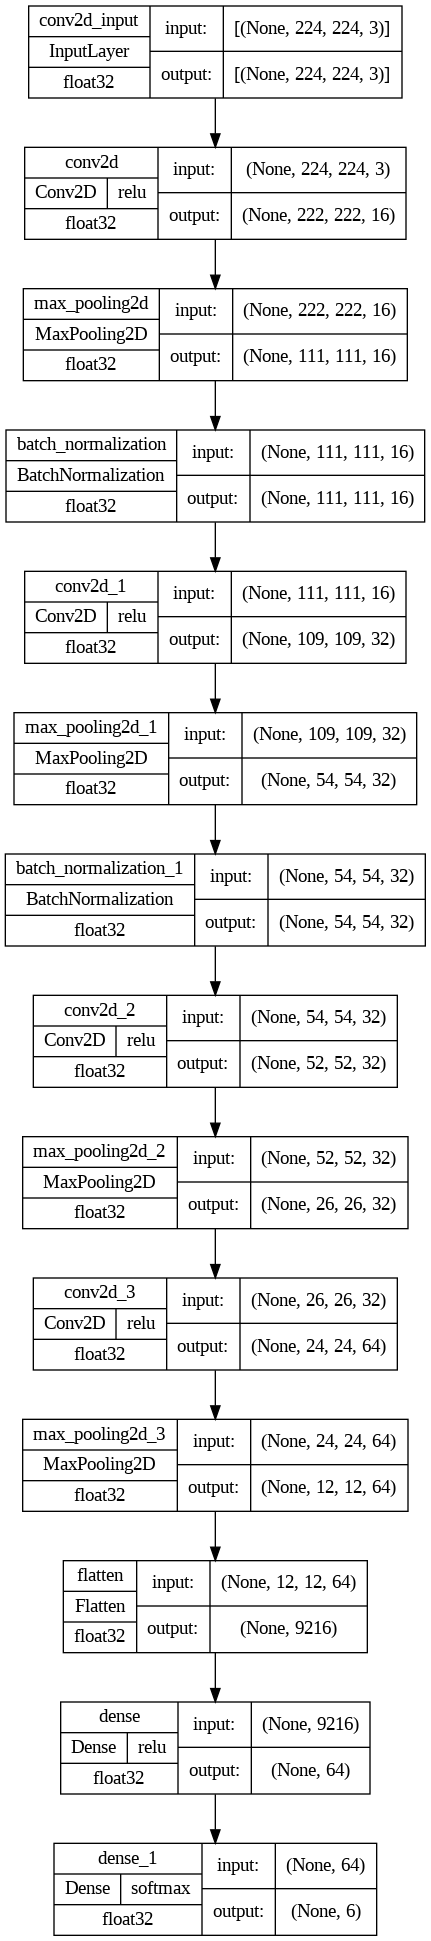

In [ ]:
plot_model(model, to_file = "drive/MyDrive/project/images/model.png", show_shapes = True,
           rankdir= 'TR', show_dtype = True, show_layer_activations= True)

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor="val_accuracy",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
lr = callbacks.ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

In [ ]:
EPOCHS = 30
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    # callbacks=[earlystopping]
)

Epoch 1/30
180/180 [==============================] - 178s 943ms/step - loss: 1.3681 - accuracy: 0.4700 - val_loss: 1.6161 - val_accuracy: 0.3883
Epoch 2/30
180/180 [==============================] - 155s 863ms/step - loss: 1.0111 - accuracy: 0.6174 - val_loss: 1.1708 - val_accuracy: 0.5682
Epoch 3/30
180/180 [==============================] - 148s 817ms/step - loss: 0.9351 - accuracy: 0.6463 - val_loss: 1.0145 - val_accuracy: 0.6098
Epoch 4/30
180/180 [==============================] - 146s 811ms/step - loss: 0.8588 - accuracy: 0.6842 - val_loss: 2.4518 - val_accuracy: 0.3106
Epoch 5/30
180/180 [==============================] - 158s 878ms/step - loss: 0.8018 - accuracy: 0.7142 - val_loss: 0.9577 - val_accuracy: 0.6534
Epoch 6/30
180/180 [==============================] - 163s 904ms/step - loss: 0.7761 - accuracy: 0.7237 - val_loss: 0.9640 - val_accuracy: 0.6629
Epoch 7/30
180/180 [==============================] - 156s 869ms/step - loss: 0.7302 - accuracy: 0.7321 - val_loss: 1.2283 -

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

22/22 [==============================] - 14s 615ms/step - loss: 0.5230 - accuracy: 0.8125
Test Accuracy: 81.25%


In [ ]:
### Plotting the Accuracy and Loss Graphs

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 180}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
print(acc, val_acc)

[0.4699999988079071, 0.6174418330192566, 0.6462790966033936, 0.6841860413551331, 0.7141860723495483, 0.723720908164978, 0.7320930361747742, 0.7372093200683594, 0.7553488612174988, 0.7611628174781799, 0.7590697407722473, 0.7748837471008301, 0.7688372135162354, 0.7776744365692139, 0.7837209105491638, 0.7930232286453247, 0.7753488421440125, 0.7916278839111328, 0.7960464954376221, 0.8030232787132263, 0.8002325296401978, 0.8037209510803223, 0.8011627793312073, 0.8081395626068115, 0.8069767355918884, 0.8158139586448669, 0.813255786895752, 0.8100000023841858, 0.8130232691764832, 0.8116279244422913] [0.38825756311416626, 0.5681818127632141, 0.6098484992980957, 0.31060606241226196, 0.6534090638160706, 0.6628788113594055, 0.5928030014038086, 0.6534090638160706, 0.7215909361839294, 0.46022728085517883, 0.751893937587738, 0.7367424368858337, 0.7310606241226196, 0.7424242496490479, 0.7196969985961914, 0.6344696879386902, 0.6287878751754761, 0.6799242496490479, 0.7556818127632141, 0.7556818127632141

In [ ]:
print(acc)

[0.4699999988079071, 0.6174418330192566, 0.6462790966033936, 0.6841860413551331, 0.7141860723495483, 0.723720908164978, 0.7320930361747742, 0.7372093200683594, 0.7553488612174988, 0.7611628174781799, 0.7590697407722473, 0.7748837471008301, 0.7688372135162354, 0.7776744365692139, 0.7837209105491638, 0.7930232286453247, 0.7753488421440125, 0.7916278839111328, 0.7960464954376221, 0.8030232787132263, 0.8002325296401978, 0.8037209510803223, 0.8011627793312073, 0.8081395626068115, 0.8069767355918884, 0.8158139586448669, 0.813255786895752, 0.8100000023841858, 0.8130232691764832, 0.8116279244422913]


In [ ]:
print(val_acc)

[0.38825756311416626, 0.5681818127632141, 0.6098484992980957, 0.31060606241226196, 0.6534090638160706, 0.6628788113594055, 0.5928030014038086, 0.6534090638160706, 0.7215909361839294, 0.46022728085517883, 0.751893937587738, 0.7367424368858337, 0.7310606241226196, 0.7424242496490479, 0.7196969985961914, 0.6344696879386902, 0.6287878751754761, 0.6799242496490479, 0.7556818127632141, 0.7556818127632141, 0.7746211886405945, 0.6704545617103577, 0.564393937587738, 0.7424242496490479, 0.7840909361839294, 0.7670454382896423, 0.6098484992980957, 0.5265151262283325, 0.7632575631141663, 0.7784090638160706]


In [ ]:
print(loss)

[1.3681221008300781, 1.0111091136932373, 0.9351403117179871, 0.8587946891784668, 0.8017978668212891, 0.7761369943618774, 0.7301523089408875, 0.7127500772476196, 0.6680473685264587, 0.6600088477134705, 0.6624049544334412, 0.6275745630264282, 0.6310921907424927, 0.6197319626808167, 0.6014152765274048, 0.581852912902832, 0.6219056248664856, 0.5826959013938904, 0.5790367722511292, 0.5425297021865845, 0.5575352907180786, 0.543554425239563, 0.577944815158844, 0.5335127115249634, 0.5460421442985535, 0.5189917087554932, 0.5289180874824524, 0.5269103050231934, 0.5182898640632629, 0.5219789147377014]


In [ ]:
print(val_loss)

[1.6160894632339478, 1.1708204746246338, 1.0144944190979004, 2.451842784881592, 0.9576593041419983, 0.9640361070632935, 1.2283438444137573, 0.998594343662262, 0.8210873603820801, 1.954220175743103, 0.6815448999404907, 0.7421826720237732, 0.8244682550430298, 0.7270293831825256, 0.7786347270011902, 1.084089994430542, 1.0088801383972168, 1.1175040006637573, 0.6259065866470337, 0.7889377474784851, 0.5910126566886902, 0.9176390171051025, 1.2616726160049438, 0.6827055215835571, 0.6195763349533081, 0.6368971467018127, 1.2412662506103516, 1.9116430282592773, 0.6304460763931274, 0.5976801514625549]


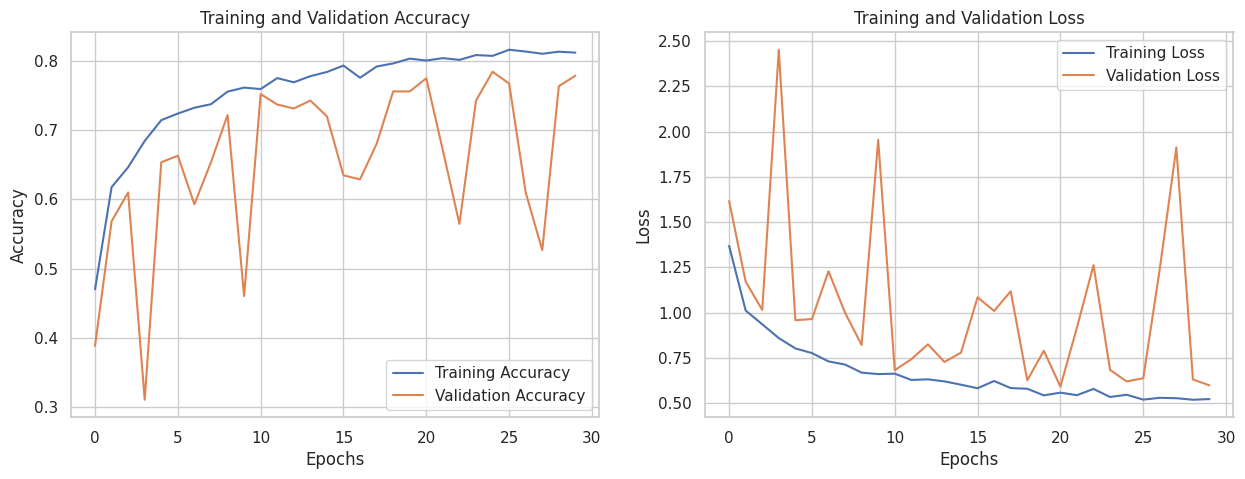

In [ ]:
# stopped_epoch = earlystopping.stopped_epoch + 1
EPOCHS = 30
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
### Running Predictions

In [ ]:
test_generator.class_indices

{'Crown and Root Rot': 0,
 'Fusarium Head Blight': 1,
 'Healthy Wheat': 2,
 'Leaf Rust': 3,
 'Wheat Loose Smut': 4,
 'Wheat___Yellow_Rust': 5}

In [ ]:
# Testing on test images:
def predict(model, img):
  image = load_image(img)
  img_array = preprocess_image(image)
  predictions = model.predict(img_array)
  predicted_class = DISEASE_CLASSES[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

---- Predicted Result ----
1/1 [==============================] - 0s 34ms/step


('Healthy Wheat', 23.64)

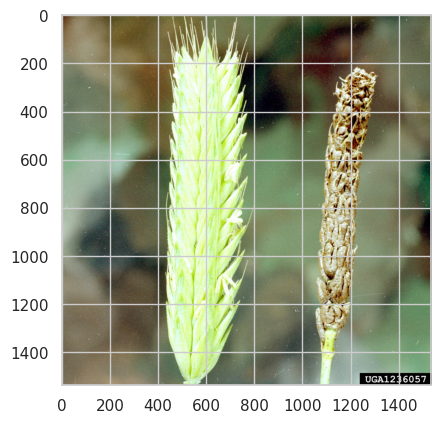

In [ ]:
plt.imshow(load_image("/content/dataset/train/Wheat Loose Smut/0051.jpg"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Wheat Loose Smut/0051.jpg")

---- Predicted Result ----
1/1 [==============================] - 0s 30ms/step


('Healthy Wheat', 21.8)

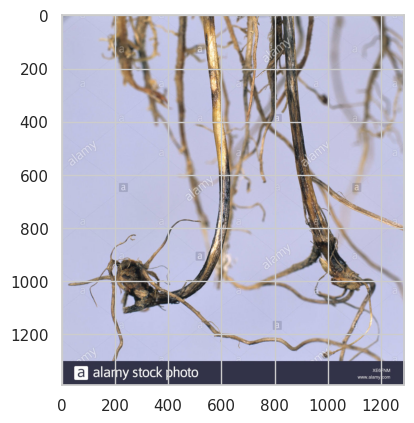

In [ ]:
plt.imshow(load_image("/content/dataset/train/Crown and Root Rot/03611.jpg"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Crown and Root Rot/03611.jpg")

In [ ]:
plt.imshow(load_image("/content/dataset/train/Healthy Wheat/01271.png"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Healthy Wheat/01271.png")

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
plt.imshow(load_image("/content/dataset/train/Fusarium Head Blight/00841.jpg"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Fusarium Head Blight/00841.jpg")

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


---- Predicted Result ----
1/1 [==============================] - 0s 19ms/step


('Healthy Wheat', 95.37)

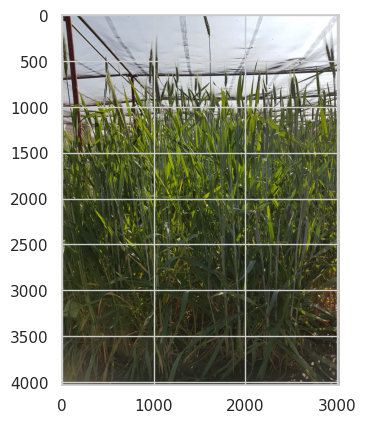

In [ ]:
plt.imshow(load_image("/content/dataset/train/Healthy Wheat/00611.jpg"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Healthy Wheat/00611.jpg")

---- Predicted Result ----
1/1 [==============================] - 0s 18ms/step


('Fusarium Head Blight', 100.0)

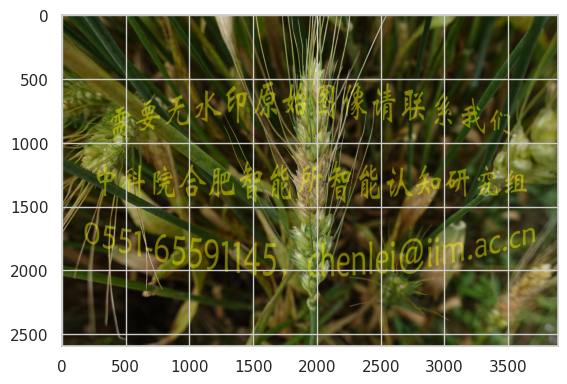

In [ ]:
plt.imshow(load_image("/content/dataset/train/Fusarium Head Blight/07661.jpg"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Fusarium Head Blight/07661.jpg")

---- Predicted Result ----
1/1 [==============================] - 0s 28ms/step


('Wheat___Yellow_Rust', 99.97)

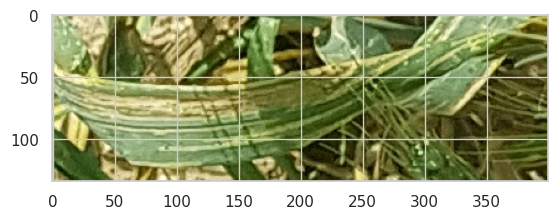

In [ ]:
plt.imshow(load_image("/content/dataset/train/Wheat___Yellow_Rust/Yellow_rust1090.png"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Wheat___Yellow_Rust/Yellow_rust1090.png")

In [ ]:
plt.imshow(load_image("/content/dataset/train/Leaf Rust/00541.JPG"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Leaf Rust/00541.JPG")

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

In [ ]:
y_test, y_labels = extract_data(test_generator)

In [ ]:
predictions = model.predict(y_test)
y_preds = np.argmax(predictions, axis=1)

17/17 [==============================] - 1s 32ms/step


In [ ]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
# print(true_classes)
print(class_labels)

['Crown and Root Rot', 'Fusarium Head Blight', 'Healthy Wheat', 'Leaf Rust', 'Wheat Loose Smut', 'Wheat___Yellow_Rust']


In [ ]:
### Saving the Model

In [ ]:
from tensorflow.keras.models import save_model

save_model(model, "custom_cnn20epochaccuratedata_model_iter_1.h5", save_format="h5")

<ipython-input-62-1010a1a45285>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "custom_cnn20epochaccuratedata_model_iter_1.h5", save_format="h5")


In [ ]:
!mv custom_cnn20epochaccuratedata_model_iter_1.h5 drive/MyDrive/

In [ ]:
import tensorflow as tf

# Load the Keras model in h5 format
model = tf.keras.models.load_model('/content/drive/MyDrive/custom_cnn20epochaccuratedata_model_iter_1.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('/content/drive/MyDrive/converted_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Conversion to TensorFlow Lite completed successfully!")

Conversion to TensorFlow Lite completed successfully!


In [ ]:
### Custom CNN Metrics

In [ ]:
cm = confusion_matrix(true_classes, y_preds)

<Axes: >

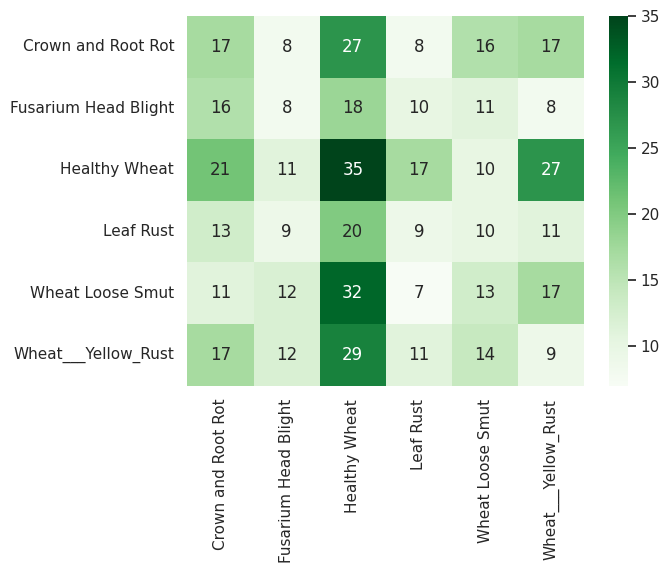

In [ ]:
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')

In [ ]:
print(classification_report(true_classes, y_preds, target_names=class_labels))

                      precision    recall  f1-score   support

  Crown and Root Rot       0.18      0.18      0.18        93
Fusarium Head Blight       0.13      0.11      0.12        71
       Healthy Wheat       0.22      0.29      0.25       121
           Leaf Rust       0.15      0.12      0.13        72
    Wheat Loose Smut       0.18      0.14      0.16        92
 Wheat___Yellow_Rust       0.10      0.10      0.10        92

            accuracy                           0.17       541
           macro avg       0.16      0.16      0.16       541
        weighted avg       0.16      0.17      0.16       541



In [ ]:
{
    "0" : "Fusarium Head Blight",
    "1" : "Healthy Wheat",
    "2" : "Leaf Rust ",
    "3" : "Wheat___Brown_Rust",
    "4" : " Wheat___Yellow_Rust ",
    "5" : "septoria"
    }

{'0': 'Fusarium Head Blight',
 '1': 'Healthy Wheat',
 '2': 'Leaf Rust ',
 '3': 'Wheat___Brown_Rust',
 '4': ' Wheat___Yellow_Rust ',
 '5': 'septoria'}

In [ ]:
{'Fusarium Head Blight': 0,
 'Healthy Whea': 1,
 'Leaf Rust': 2,
 'Wheat___Brown_Rust': 3,
 'Wheat___Yellow_Rust': 4,
 'septoria': 5
}

{'Fusarium Head Blight': 0,
 'Healthy Whea': 1,
 'Leaf Rust': 2,
 'Wheat___Brown_Rust': 3,
 'Wheat___Yellow_Rust': 4,
 'septoria': 5}

In [ ]:
Using Transfer Learning with ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet

resnet = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
print(f"Number of layers in ResNet50: {len(resnet.layers)}")
print(f"Number of layers in ResNet50: {len(resnet.layers[:100])}")

Number of layers in ResNet50: 175
Number of layers in ResNet50: 100


In [ ]:
# finetune_layers = 100
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
#### ResNet50 Model

In [ ]:
from keras import layers, models
from keras.applications import ResNet50

# Load ResNet50 model without the top classification layer
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the ResNet50 layers
resnet.trainable = False

# Create your model
model_resnet = models.Sequential()
model_resnet.add(resnet)
model_resnet.add(layers.GlobalAveragePooling2D())
model_resnet.add(layers.Dense(64, activation='relu'))
model_resnet.add(layers.Dropout(0.2))
model_resnet.add(layers.Dense(num_classes,activation='softmax'))


# Compile the model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_resnet.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 23719238 (90.48 MB)
Trainable params: 131526 (513.77 KB)
Non-trainable params: 23587712 (89.98 MB)
_______

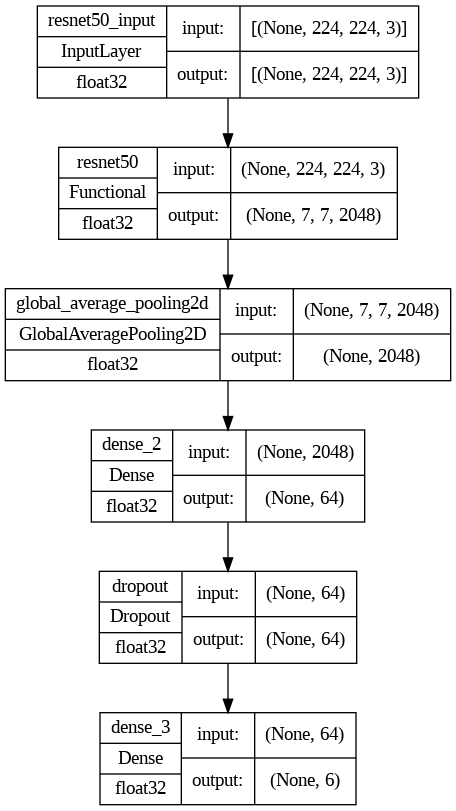

In [ ]:
plot_model(model_resnet, show_shapes = True, show_dtype = True)

In [ ]:
resnet_train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      zoom_range=0.1,
                                      horizontal_flip=True,
                                      vertical_flip = True,
                                      preprocessing_function=preprocess_input_resnet)

resnet_val_test_datagen = ImageDataGenerator(rescale=1./255,
                                             preprocessing_function=preprocess_input_resnet)

train_generator_resnet = resnet_train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42)

validation_generator_resnet = resnet_val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    shuffle=True,
    seed=42,
    class_mode='categorical')

test_generator_resnet = resnet_val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')


Found 4324 images belonging to 6 classes.
Found 543 images belonging to 6 classes.
Found 541 images belonging to 6 classes.


In [ ]:
model_resnet.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history_resnet = model_resnet.fit(
    train_generator_resnet,
    steps_per_epoch=train_generator_resnet.samples // 32,
    epochs=20,
    validation_data=validation_generator_resnet,
    validation_steps=validation_generator_resnet.samples // 32
    )

Epoch 1/20
135/135 [==============================] - 180s 1s/step - loss: 1.7557 - accuracy: 0.2612 - val_loss: 1.7153 - val_accuracy: 0.3047
Epoch 2/20
135/135 [==============================] - 150s 1s/step - loss: 1.6978 - accuracy: 0.2954 - val_loss: 1.7093 - val_accuracy: 0.3027
Epoch 3/20
135/135 [==============================] - 156s 1s/step - loss: 1.6727 - accuracy: 0.3185 - val_loss: 1.6467 - val_accuracy: 0.3398
Epoch 4/20
135/135 [==============================] - 146s 1s/step - loss: 1.6288 - accuracy: 0.3378 - val_loss: 1.6015 - val_accuracy: 0.3711
Epoch 5/20
135/135 [==============================] - 150s 1s/step - loss: 1.6069 - accuracy: 0.3493 - val_loss: 1.5873 - val_accuracy: 0.3672
Epoch 6/20
135/135 [==============================] - 155s 1s/step - loss: 1.5859 - accuracy: 0.3516 - val_loss: 1.5634 - val_accuracy: 0.3809
Epoch 7/20
135/135 [==============================] - 159s 1s/step - loss: 1.5697 - accuracy: 0.3532 - val_loss: 1.5227 - val_accuracy: 0.3848

In [ ]:
test_loss_resnet, test_accuracy_resnet = model_resnet.evaluate(test_generator_resnet, steps=test_generator_resnet.samples // 32)
print(f'Test Accuracy: {test_accuracy_resnet * 100:.2f}%')

16/16 [==============================] - 14s 940ms/step - loss: 1.3926 - accuracy: 0.4473
Test Accuracy: 44.73%


In [ ]:
#### Plotting Accuracy And Loss Graphs

In [ ]:
history_resnet.params

{'verbose': 1, 'epochs': 20, 'steps': 135}

In [ ]:
history_resnet.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history_resnet.history['accuracy']
val_acc = history_resnet.history['val_accuracy']

loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']

In [ ]:
print(acc, val_acc)

[0.26118358969688416, 0.29543337225914, 0.31849953532218933, 0.3378378450870514, 0.34925442934036255, 0.3515843451023102, 0.3532152771949768, 0.3823392391204834, 0.38536813855171204, 0.38793104887008667, 0.39422181248664856, 0.40866729617118835, 0.40773531794548035, 0.4058713912963867, 0.410065233707428, 0.41682198643684387, 0.4408201277256012, 0.4259086549282074, 0.43825721740722656, 0.44431501626968384] [0.3046875, 0.302734375, 0.33984375, 0.37109375, 0.3671875, 0.380859375, 0.384765625, 0.380859375, 0.369140625, 0.431640625, 0.416015625, 0.416015625, 0.416015625, 0.404296875, 0.447265625, 0.421875, 0.421875, 0.447265625, 0.4453125, 0.455078125]


In [ ]:
print(acc)

[0.26118358969688416, 0.29543337225914, 0.31849953532218933, 0.3378378450870514, 0.34925442934036255, 0.3515843451023102, 0.3532152771949768, 0.3823392391204834, 0.38536813855171204, 0.38793104887008667, 0.39422181248664856, 0.40866729617118835, 0.40773531794548035, 0.4058713912963867, 0.410065233707428, 0.41682198643684387, 0.4408201277256012, 0.4259086549282074, 0.43825721740722656, 0.44431501626968384]


In [ ]:
print(val_acc)

[0.3046875, 0.302734375, 0.33984375, 0.37109375, 0.3671875, 0.380859375, 0.384765625, 0.380859375, 0.369140625, 0.431640625, 0.416015625, 0.416015625, 0.416015625, 0.404296875, 0.447265625, 0.421875, 0.421875, 0.447265625, 0.4453125, 0.455078125]


In [ ]:
print(val_loss)

[1.7152912616729736, 1.7093489170074463, 1.6467394828796387, 1.6015228033065796, 1.5872925519943237, 1.5633879899978638, 1.5227088928222656, 1.535859227180481, 1.5468337535858154, 1.4955025911331177, 1.5028321743011475, 1.476585030555725, 1.4279977083206177, 1.467029333114624, 1.4302724599838257, 1.4646974802017212, 1.4840856790542603, 1.4012984037399292, 1.4106537103652954, 1.4190351963043213]


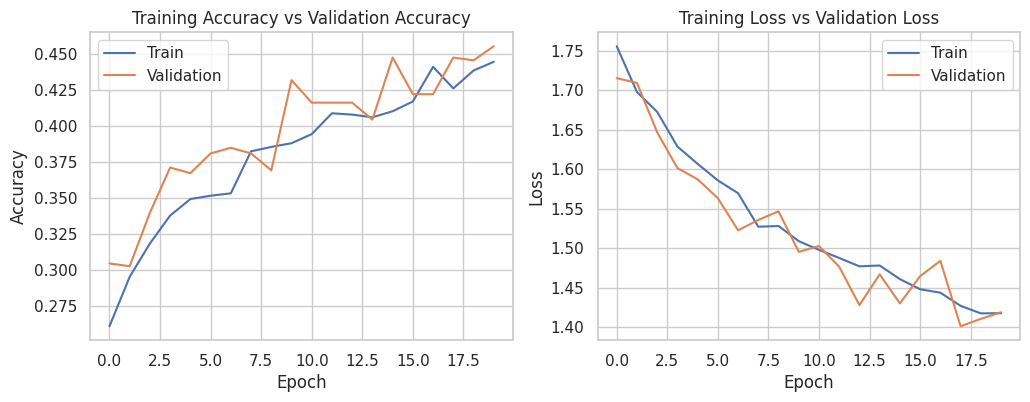

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history_resnet.history['accuracy']
train_loss = history_resnet.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history_resnet.history['accuracy'])
ax[0].plot(history_resnet.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_resnet.history['loss'])
ax[1].plot(history_resnet.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [ ]:
#### Running Predictions

In [ ]:
def predict_resnet(res_model, img):
  image = load_image(img)

  img_array = cv2.resize(image, (224, 224))
  img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array = img_array / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input_resnet(img_array)

  predictions = res_model.predict(img_array)
  predicted_class = DISEASE_CLASSES[np.argmax(predictions)]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

In [ ]:
print(train_generator_resnet.class_indices)

{'Crown and Root Rot': 0, 'Fusarium Head Blight': 1, 'Healthy Wheat': 2, 'Leaf Rust': 3, 'Wheat Loose Smut': 4, 'Wheat___Yellow_Rust': 5}


In [ ]:
def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

In [ ]:
print(DISEASE_CLASSES)

['Crown and Root Rot', 'Fusarium Head Blight', 'Healthy Wheat', 'Leaf Rust', 'Wheat Loose Smut', 'Wheat___Yellow_Rust']


In [ ]:
y_test, y_labels = extract_data(test_generator_resnet)

In [ ]:
print(np.unique(y_labels))

[0. 1.]


In [ ]:
true_classes = test_generator_resnet.classes
class_labels = list(test_generator_resnet.class_indices.keys())
# print(true_classes)
print(class_labels)

['Crown and Root Rot', 'Fusarium Head Blight', 'Healthy Wheat', 'Leaf Rust', 'Wheat Loose Smut', 'Wheat___Yellow_Rust']


In [ ]:
predictions_resnet = model_resnet.predict(y_test)
y_preds = np.argmax(predictions_resnet, axis=1)

17/17 [==============================] - 4s 219ms/step


In [ ]:
print(y_preds)

[0 2 4 4 4 2 4 0 4 2 4 0 0 2 4 4 1 4 5 2 2 2 0 0 2 4 0 0 2 0 2 5 4 2 0 4 0
 2 0 2 4 0 2 2 5 0 3 5 2 2 2 5 5 2 0 2 4 2 4 0 3 4 2 2 4 0 2 3 2 4 2 4 2 2
 5 4 4 4 4 0 2 2 3 5 2 2 4 2 2 0 2 2 4 4 2 1 2 4 4 2 2 2 2 2 2 2 2 1 2 2 2
 2 5 1 5 1 1 5 5 1 5 5 5 5 5 5 4 4 4 5 1 1 1 4 2 1 4 2 4 2 0 3 4 2 4 2 4 2
 2 5 4 5 4 4 1 4 4 5 0 2 4 2 2 4 2 2 2 2 2 2 2 2 4 3 2 2 2 1 2 3 2 2 2 3 2
 4 3 2 2 2 2 2 2 2 4 2 4 2 0 4 4 2 2 3 0 2 2 2 2 4 2 4 2 2 4 4 2 2 2 2 2 4
 2 2 3 2 2 2 2 2 2 2 2 4 2 2 2 4 2 2 2 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 4 2 2
 2 2 2 2 2 5 2 2 2 2 0 2 4 2 3 2 2 2 2 2 3 2 4 2 2 2 3 0 0 3 3 4 4 2 3 3 2
 3 2 2 3 4 0 2 3 4 2 0 3 2 4 0 2 3 2 5 3 3 4 2 3 3 3 3 3 3 3 2 5 0 3 3 2 2
 5 2 4 4 4 2 5 2 3 2 2 2 3 2 5 3 3 3 3 3 4 5 3 3 2 4 2 4 4 4 4 0 2 4 4 4 5
 4 4 4 4 2 3 5 0 2 2 4 4 0 0 4 2 0 4 2 4 4 2 2 2 2 1 2 5 2 5 1 2 4 0 4 5 4
 4 4 5 0 2 4 3 4 4 4 4 2 2 4 0 4 3 4 2 4 2 2 2 4 2 4 4 4 2 2 4 4 4 4 2 4 3
 4 2 4 2 2 5 3 5 5 3 2 3 5 1 5 5 3 3 5 5 5 5 5 5 5 5 2 3 3 4 5 3 3 5 5 5 5
 3 5 4 5 5 5 5 5 3 3 5 5 

In [ ]:
#### ResNet Metrics

<Axes: >

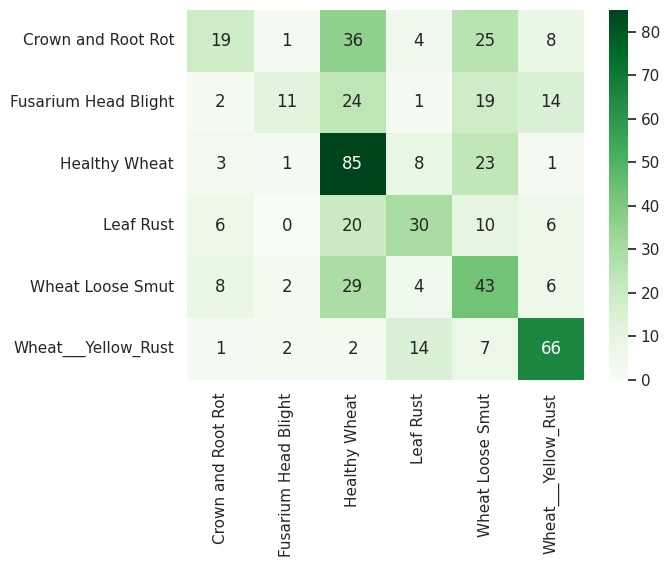

In [ ]:
cm = confusion_matrix(true_classes, y_preds)
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')

In [ ]:
print(classification_report(true_classes, y_preds, target_names=class_labels))

                      precision    recall  f1-score   support

  Crown and Root Rot       0.49      0.20      0.29        93
Fusarium Head Blight       0.65      0.15      0.25        71
       Healthy Wheat       0.43      0.70      0.54       121
           Leaf Rust       0.49      0.42      0.45        72
    Wheat Loose Smut       0.34      0.47      0.39        92
 Wheat___Yellow_Rust       0.65      0.72      0.68        92

            accuracy                           0.47       541
           macro avg       0.51      0.44      0.43       541
        weighted avg       0.50      0.47      0.45       541



In [ ]:
#saving resnet model

In [ ]:
from tensorflow.keras.models import save_model

save_model(model_resnet, "resnet_model_iter_1.h5", save_format="h5")

<ipython-input-109-555a0afa7347>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_resnet, "resnet_model_iter_1.h5", save_format="h5")


In [ ]:
!mv resnet_model_iter_1.h5 drive/MyDrive/

In [ ]:
import tensorflow as tf

# Load the Keras model in h5 format
model = tf.keras.models.load_model('/content/drive/MyDrive/resnet_model_iter_1.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('/content/drive/MyDrive/converted_resnetmodel.tflite', 'wb') as f:
    f.write(tflite_model)

print("Conversion to TensorFlow Lite completed successfully!")

Conversion to TensorFlow Lite completed successfully!


In [ ]:
## Using Transfer Learning with VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg

vgg16 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
print(len(vgg16.layers))

19


In [ ]:
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
#### VGG16 Model

In [ ]:
model_vgg16 = models.Sequential()

model_vgg16.add(vgg16)
model_vgg16.add(layers.Flatten())
model_vgg16.add(layers.Dense(128,activation='relu'))
# model_vgg16.add(layers.BatchNormalization())
model_vgg16.add(layers.Dropout(0.2))

model_vgg16.add(layers.Dense(32,activation='relu'))
model_vgg16.add(layers.Dense(6,activation='softmax'))

In [ ]:
model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 6)                 198       
                                                                 
Total params: 17930406 (68.40 MB)
Trainable params: 32

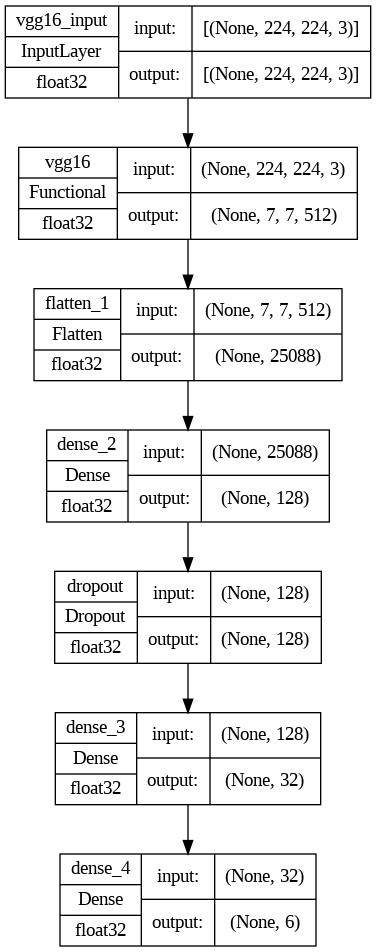

In [ ]:
plot_model(model_vgg16, show_shapes = True, show_dtype = True)

In [ ]:
vgg_train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      zoom_range=0.1,
                                      horizontal_flip=True,
                                      vertical_flip = True,
                                      preprocessing_function=preprocess_input_vgg
                                      )

vgg_val_test_datagen = ImageDataGenerator(rescale=1./255,
                                          preprocessing_function=preprocess_input_vgg)

train_generator_vgg = vgg_train_datagen.flow_from_directory(train_dir, target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42)

validation_generator_vgg = vgg_val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42
    )

test_generator_vgg = vgg_val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')

Found 3918 images belonging to 6 classes.
Found 493 images belonging to 6 classes.
Found 490 images belonging to 6 classes.


In [ ]:




model_vgg16.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history_vgg = model_vgg16.fit(
    train_generator_vgg,
    steps_per_epoch=train_generator_vgg.samples // 32,
    epochs=20,
    validation_data=validation_generator_vgg,
    validation_steps=validation_generator_vgg.samples // 32,
    # callbacks=[earlystopping]
)


Epoch 1/20
122/122 [==============================] - 200s 2s/step - loss: 1.3880 - accuracy: 0.4642 - val_loss: 0.8982 - val_accuracy: 0.6792
Epoch 2/20
122/122 [==============================] - 173s 1s/step - loss: 0.9489 - accuracy: 0.6511 - val_loss: 0.8197 - val_accuracy: 0.7063
Epoch 3/20
122/122 [==============================] - 175s 1s/step - loss: 0.7847 - accuracy: 0.7092 - val_loss: 0.6662 - val_accuracy: 0.7542
Epoch 4/20
122/122 [==============================] - 175s 1s/step - loss: 0.6803 - accuracy: 0.7581 - val_loss: 0.6322 - val_accuracy: 0.7854
Epoch 5/20
122/122 [==============================] - 179s 1s/step - loss: 0.6222 - accuracy: 0.7728 - val_loss: 0.5880 - val_accuracy: 0.7833
Epoch 6/20
122/122 [==============================] - 170s 1s/step - loss: 0.5695 - accuracy: 0.7946 - val_loss: 0.5946 - val_accuracy: 0.7917
Epoch 7/20
122/122 [==============================] - 177s 1s/step - loss: 0.5511 - accuracy: 0.7972 - val_loss: 0.5603 - val_accuracy: 0.7688

In [ ]:
test_loss_vgg, test_accuracy_vgg = model_vgg16.evaluate(test_generator_vgg, steps=test_generator_vgg.samples // 32)
print(f'Test Accuracy: {test_accuracy_vgg * 100:.2f}%')

15/15 [==============================] - 17s 1s/step - loss: 0.3746 - accuracy: 0.8729
Test Accuracy: 87.29%


In [ ]:
#### Plotting Graphs

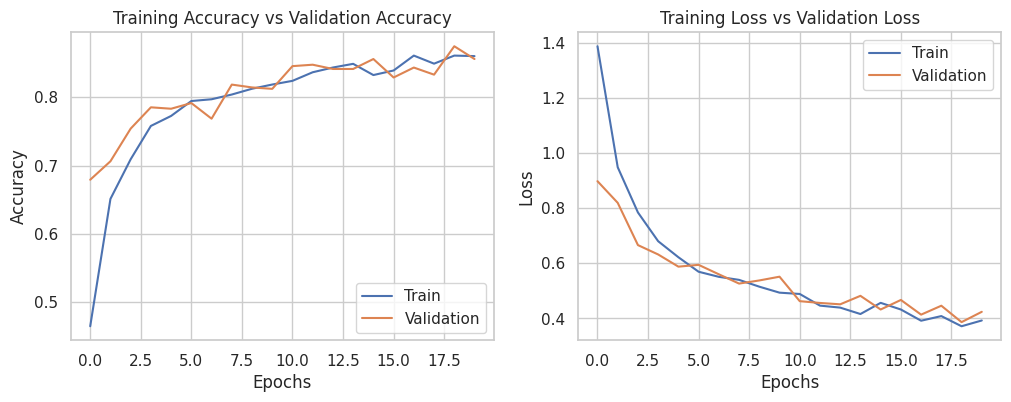

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history_vgg.history['accuracy']
train_loss = history_vgg.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history_vgg.history['accuracy'])
ax[0].plot(history_vgg.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Train', 'Validation'], loc='lower right')

ax[1].plot(history_vgg.history['loss'])
ax[1].plot(history_vgg.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [ ]:
#running image prediction

In [ ]:
test_generator.class_indices

{'Crown and Root Rot': 0,
 'Fusarium Head Blight': 1,
 'Leaf Rust': 2,
 'Wheat Loose Smut': 3,
 'Wheat___Yellow_Rust': 4,
 'Wheat_healthy': 5}

In [ ]:
# Testing on test images:
def predict(model, img):
  image = load_image(img)
  img_array = preprocess_image(image)
  predictions = model.predict(img_array)
  predicted_class = DISEASE_CLASSES[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

---- Predicted Result ----
1/1 [==============================] - 0s 111ms/step


('Wheat_healthy', 19.77)

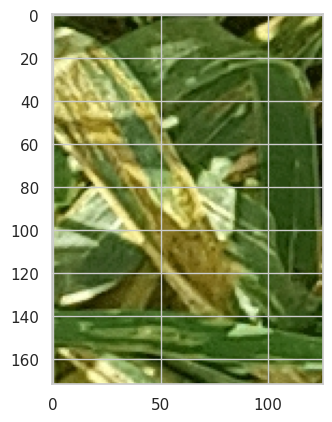

In [ ]:
plt.imshow(load_image("/content/dataset/train/Wheat___Yellow_Rust/Yellow_rust032.png"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Wheat___Yellow_Rust/Yellow_rust032.png")

---- Predicted Result ----
1/1 [==============================] - 0s 20ms/step


('Wheat_healthy', 21.22)

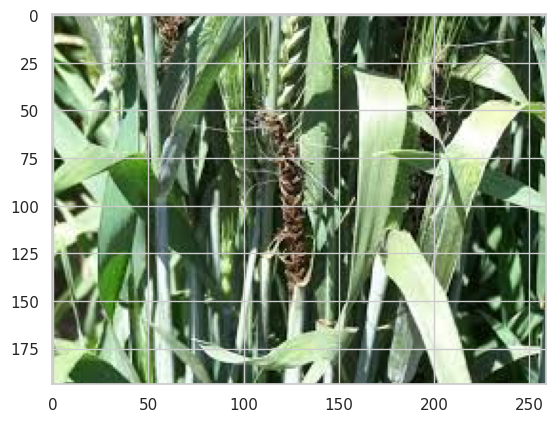

In [ ]:
plt.imshow(load_image("/content/dataset/train/Wheat Loose Smut/0961.jpg"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Wheat Loose Smut/0961.jpg")

In [ ]:
#### Running Predictions

In [ ]:
def predict_vgg(vgg_model, img):
  image = load_image(img)

  img_array = cv2.resize(image, (224, 224))
  img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array = img_array / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input_vgg(img_array)

  predictions = vgg_model.predict(img_array)
  predicted_class = DISEASE_CLASSES[np.argmax(predictions)]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

In [ ]:
def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

In [ ]:
print(test_generator_vgg.class_indices)

{'Crown and Root Rot': 0, 'Fusarium Head Blight': 1, 'Leaf Rust': 2, 'Wheat Loose Smut': 3, 'Wheat___Yellow_Rust': 4, 'Wheat_healthy': 5}


In [ ]:
print(DISEASE_CLASSES)

['Crown and Root Rot', 'Fusarium Head Blight', 'Wheat_healthy', 'Leaf Rust', 'Wheat Loose Smut', 'Wheat___Yellow_Rust']


In [ ]:
y_test, y_labels = extract_data(test_generator_vgg)

In [ ]:
print(np.unique(y_labels))

[0. 1.]


In [ ]:
predictions_vgg = model_vgg16.predict(y_test)
y_preds = np.argmax(predictions_vgg, axis=1)

16/16 [==============================] - 2s 122ms/step


In [ ]:
print(y_preds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 5 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 1 3 1 0 0 1 1 1 1 1
 1 1 1 1 1 2 1 5 0 3 3 5 3 3 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 0 3 0 3 3 3 4 3 3 3 3 3 3 3 5 3 0
 3 2 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 5 4 0 5 3 3 3 0 3 3 0 3 5 3 3 3 3 3 3
 3 0 3 3 2 3 3 3 3 3 0 3 5 0 0 3 3 3 0 3 3 3 3 3 5 3 3 3 3 3 3 5 4 3 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 5 0 0 5 5 3 5 5 5 5 5 3 3 5 0 5 0 5 5 5 5 0 0 0
 5 5 5 2 0 2 5 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5]


In [ ]:
true_classes = test_generator_vgg.classes
class_labels = list(test_generator_vgg.class_indices.keys())
# print(true_classes)
print(class_labels)

['Crown and Root Rot', 'Fusarium Head Blight', 'Leaf Rust', 'Wheat Loose Smut', 'Wheat___Yellow_Rust', 'Wheat_healthy']


In [ ]:
#### VGG Metrics

<Axes: >

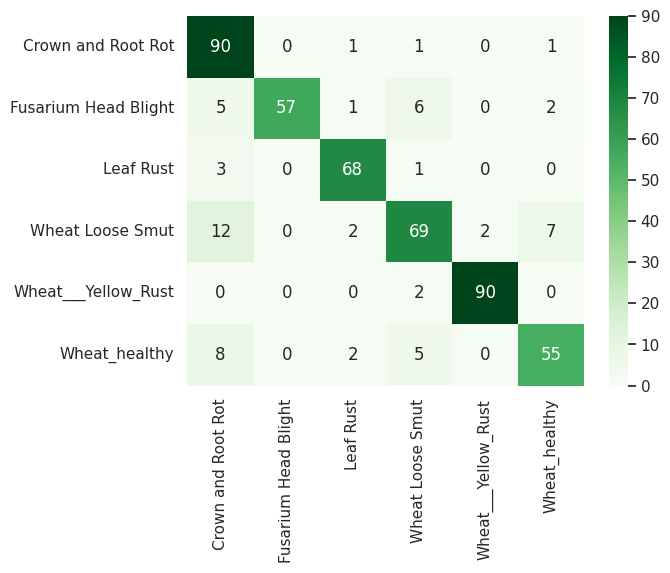

In [ ]:
cm = confusion_matrix(true_classes, y_preds)
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')

In [ ]:
print(classification_report(true_classes, y_preds, target_names=class_labels))

                      precision    recall  f1-score   support

  Crown and Root Rot       0.76      0.97      0.85        93
Fusarium Head Blight       1.00      0.80      0.89        71
           Leaf Rust       0.92      0.94      0.93        72
    Wheat Loose Smut       0.82      0.75      0.78        92
 Wheat___Yellow_Rust       0.98      0.98      0.98        92
       Wheat_healthy       0.85      0.79      0.81        70

            accuracy                           0.88       490
           macro avg       0.89      0.87      0.88       490
        weighted avg       0.88      0.88      0.88       490



In [ ]:
### Saving the Model

In [ ]:
from tensorflow.keras.models import save_model

save_model(model_vgg16, "vgg16_model_iter_1.h5", save_format="h5")

<ipython-input-101-182c6cf27600>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_vgg16, "vgg16_model_iter_1.h5", save_format="h5")


In [ ]:
!mv vgg16_model_iter_1.h5 drive/MyDrive/


In [ ]:
import tensorflow as tf

# Load the Keras model in h5 format
model = tf.keras.models.load_model('/content/drive/MyDrive/vgg16_model_iter_1.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('/content/drive/MyDrive/converted_vgg16model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Conversion to TensorFlow Lite completed successfully!")

Conversion to TensorFlow Lite completed successfully!


In [ ]:
## Using Tranfer Learning with MobileNetV2

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mb

mobilenet = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
print(len(mobilenet.layers))

154


In [ ]:
for layer in mobilenet.layers:
  layer.trainable = False

In [ ]:
### MobileNetV2 Model

In [ ]:
model_mb = models.Sequential()

model_mb.add(mobilenet)
model_mb.add(layers.Flatten())
# model_mb.add(layers.Dropout(0.5))
model_mb.add(layers.Dense(64,activation='relu'))
# model_mb.add(layers.BatchNormalization())
model_mb.add(layers.Dropout(0.2))

# model_mb.add(layers.Dense(128,activation='relu'))
# model_mb.add(layers.Dropout(0.2))
model_mb.add(layers.Dense(6,activation='softmax'))

In [ ]:
model_mb.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                4014144   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 6)                 390       
                                                                 
Total params: 6272518 (23.93 MB)
Trainable params: 4014534 (15.31 MB)
Non-trainable params: 2257984 (8.61 MB)
__________

In [ ]:
mb_train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      vertical_flip = True,
                                      preprocessing_function=preprocess_input_mb
                                      )

mb_val_test_datagen = ImageDataGenerator(rescale=1./255,
                                      preprocessing_function=preprocess_input_mb)

train_generator_mb = mb_train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    seed=42)

validation_generator_mb = mb_val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')

test_generator_mb = mb_val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')

Found 4324 images belonging to 6 classes.
Found 543 images belonging to 6 classes.
Found 541 images belonging to 6 classes.


In [ ]:
model_mb.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history_mb = model_mb.fit(
   train_generator_mb ,
    steps_per_epoch=train_generator_mb.samples // 32,
    epochs=20,
    validation_data=validation_generator_mb,
    validation_steps=validation_generator_mb.samples // 32
    )

Epoch 1/20
135/135 [==============================] - 159s 1s/step - loss: 2.5198 - accuracy: 0.2041 - val_loss: 1.7879 - val_accuracy: 0.2207
Epoch 2/20
135/135 [==============================] - 141s 1s/step - loss: 1.8043 - accuracy: 0.2234 - val_loss: 1.7833 - val_accuracy: 0.2246
Epoch 3/20
135/135 [==============================] - 145s 1s/step - loss: 1.7814 - accuracy: 0.2234 - val_loss: 1.7798 - val_accuracy: 0.2227
Epoch 4/20
135/135 [==============================] - 139s 1s/step - loss: 1.7788 - accuracy: 0.2232 - val_loss: 1.7776 - val_accuracy: 0.2227
Epoch 5/20
135/135 [==============================] - 141s 1s/step - loss: 1.7774 - accuracy: 0.2227 - val_loss: 1.7762 - val_accuracy: 0.2266
Epoch 6/20
135/135 [==============================] - 140s 1s/step - loss: 1.7759 - accuracy: 0.2244 - val_loss: 1.7771 - val_accuracy: 0.2188
Epoch 7/20
135/135 [==============================] - 139s 1s/step - loss: 1.7757 - accuracy: 0.2234 - val_loss: 1.7743 - val_accuracy: 0.2246

In [ ]:
test_loss_mobile, test_accuracy_mobile = model_mb.evaluate(test_generator_mb, steps=test_generator_mb.samples // 32)
print(f'Test Accuracy: {test_accuracy_mobile* 100:.2f}%')

16/16 [==============================] - 19s 1s/step - loss: 1.7754 - accuracy: 0.2188
Test Accuracy: 21.88%


In [ ]:
### Plotting the Accuracy and Loss Graphs

In [ ]:
history_mb.params

{'verbose': 1, 'epochs': 20, 'steps': 135}

In [ ]:
history_mb.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history_mb.history['accuracy']
val_acc = history_mb.history['val_accuracy']

loss = history_mb.history['loss']
val_loss = history_mb.history['val_loss']

In [ ]:
print(acc, val_acc)

[0.20410065352916718, 0.22343896329402924, 0.22343896329402924, 0.22320596873760223, 0.22273997962474823, 0.22437092661857605, 0.22343896329402924, 0.22367194294929504, 0.22343896329402924, 0.22367194294929504, 0.22367194294929504, 0.22273997962474823, 0.22250698506832123, 0.22437092661857605, 0.22367194294929504, 0.22343896329402924, 0.22320596873760223, 0.22413793206214905, 0.22297297418117523, 0.22413793206214905] [0.220703125, 0.224609375, 0.22265625, 0.22265625, 0.2265625, 0.21875, 0.224609375, 0.224609375, 0.22265625, 0.21875, 0.224609375, 0.224609375, 0.21875, 0.2265625, 0.23046875, 0.2265625, 0.224609375, 0.220703125, 0.22265625, 0.21484375]


In [ ]:
print(acc)

[0.20410065352916718, 0.22343896329402924, 0.22343896329402924, 0.22320596873760223, 0.22273997962474823, 0.22437092661857605, 0.22343896329402924, 0.22367194294929504, 0.22343896329402924, 0.22367194294929504, 0.22367194294929504, 0.22273997962474823, 0.22250698506832123, 0.22437092661857605, 0.22367194294929504, 0.22343896329402924, 0.22320596873760223, 0.22413793206214905, 0.22297297418117523, 0.22413793206214905]


In [ ]:
print(val_acc)

[0.220703125, 0.224609375, 0.22265625, 0.22265625, 0.2265625, 0.21875, 0.224609375, 0.224609375, 0.22265625, 0.21875, 0.224609375, 0.224609375, 0.21875, 0.2265625, 0.23046875, 0.2265625, 0.224609375, 0.220703125, 0.22265625, 0.21484375]


In [ ]:
print(loss)

[2.5198018550872803, 1.8043299913406372, 1.7813560962677002, 1.7788300514221191, 1.7774094343185425, 1.7758926153182983, 1.7756859064102173, 1.7753316164016724, 1.7749691009521484, 1.775022029876709, 1.7750730514526367, 1.775450587272644, 1.775425910949707, 1.7748262882232666, 1.7749983072280884, 1.7750611305236816, 1.775151252746582, 1.77476167678833, 1.7754448652267456, 1.7749220132827759]


In [ ]:
print(val_loss)

[1.7879403829574585, 1.7832621335983276, 1.7797553539276123, 1.7776379585266113, 1.776224136352539, 1.7771178483963013, 1.7742966413497925, 1.7742935419082642, 1.7753218412399292, 1.778185486793518, 1.774741291999817, 1.7722984552383423, 1.775721788406372, 1.7736231088638306, 1.7721482515335083, 1.773179531097412, 1.7731947898864746, 1.7762326002120972, 1.7757405042648315, 1.7783130407333374]


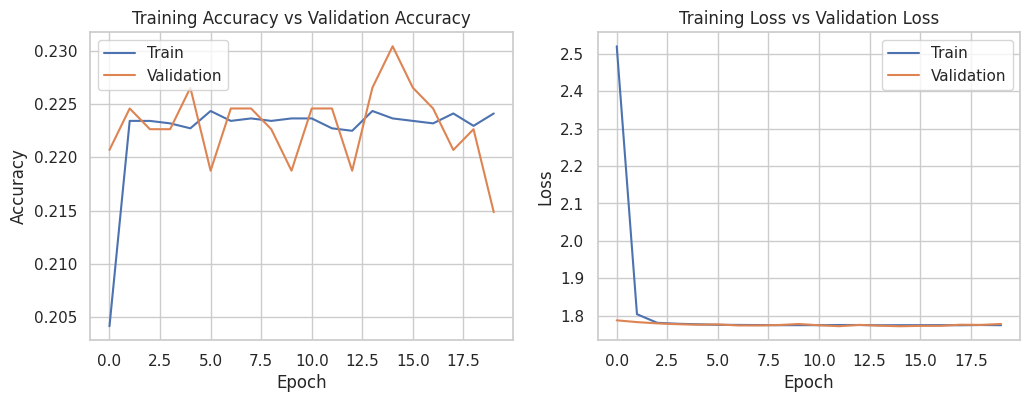

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history_mb.history['accuracy']
train_loss = history_mb.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history_mb.history['accuracy'])
ax[0].plot(history_mb.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_mb.history['loss'])
ax[1].plot(history_mb.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [ ]:
#### Running Predictions

In [ ]:
def predict_mb(mb_model, img):
  image = load_image(img)

  img_array = cv2.resize(image, (224, 224))
  img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array = img_array / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input_mb(img_array)

  predictions = mb_model.predict(img_array)
  predicted_class = DISEASE_CLASSES[np.argmax(predictions)]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

In [ ]:
def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

In [ ]:
print(test_generator_mb.class_indices)

{'Crown and Root Rot': 0, 'Fusarium Head Blight': 1, 'Healthy Wheat': 2, 'Leaf Rust': 3, 'Wheat Loose Smut': 4, 'Wheat___Yellow_Rust': 5}


In [ ]:
print(DISEASE_CLASSES)

['Crown and Root Rot', 'Fusarium Head Blight', 'Healthy Wheat', 'Leaf Rust', 'Wheat Loose Smut', 'Wheat___Yellow_Rust']


In [ ]:
y_test, y_labels = extract_data(test_generator_mb)

In [ ]:
print(np.unique(y_labels))

[0. 1.]


In [ ]:
predictions_mb = model_mb.predict(y_test)
y_preds = np.argmax(predictions_mb, axis=1)

17/17 [==============================] - 2s 100ms/step


In [ ]:
print(y_preds)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
true_classes = test_generator_mb.classes
class_labels = list(test_generator_mb.class_indices.keys())
# print(true_classes)
print(class_labels)

['Crown and Root Rot', 'Fusarium Head Blight', 'Healthy Wheat', 'Leaf Rust', 'Wheat Loose Smut', 'Wheat___Yellow_Rust']


In [ ]:
#### mobilenet Metrics

<Axes: >

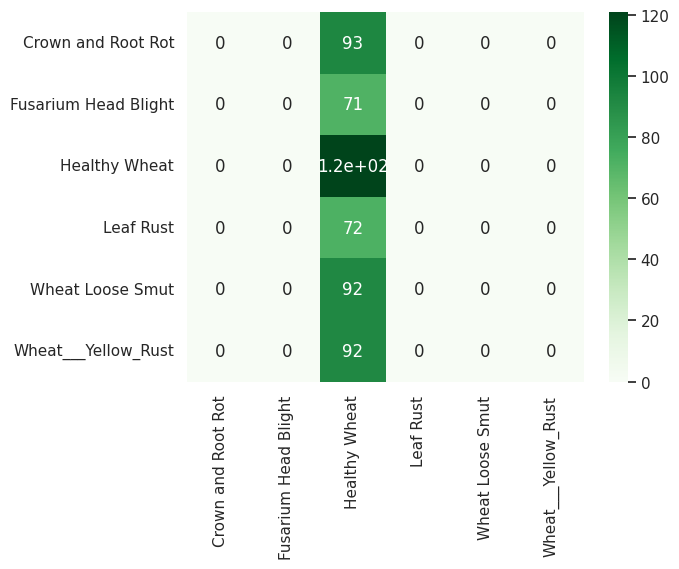

In [ ]:
cm = confusion_matrix(true_classes, y_preds)
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')

In [ ]:
print(classification_report(true_classes, y_preds, target_names=class_labels))

                      precision    recall  f1-score   support

  Crown and Root Rot       0.00      0.00      0.00        93
Fusarium Head Blight       0.00      0.00      0.00        71
       Healthy Wheat       0.22      1.00      0.37       121
           Leaf Rust       0.00      0.00      0.00        72
    Wheat Loose Smut       0.00      0.00      0.00        92
 Wheat___Yellow_Rust       0.00      0.00      0.00        92

            accuracy                           0.22       541
           macro avg       0.04      0.17      0.06       541
        weighted avg       0.05      0.22      0.08       541



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#plotting graph

In [ ]:
#saving model

In [ ]:
from tensorflow.keras.models import save_model

save_model(model_mb, "mobilenet.h5", save_format="h5")

<ipython-input-98-0b28825a8ef8>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_mb, "mobilenet.h5", save_format="h5")


In [ ]:
!mv mobilenet.h5 drive/MyDrive/

In [ ]:
import tensorflow as tf

# Load the Keras model in h5 format
model = tf.keras.models.load_model('/content/drive/MyDrive/mobilenet.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('/content/drive/MyDrive/converted_mobnetmodel.tflite', 'wb') as f:
    f.write(tflite_model)

print("Conversion to TensorFlow Lite completed successfully!")

Conversion to TensorFlow Lite completed successfully!
